<a href="https://colab.research.google.com/github/acaversa/Data_Science_Challenge_Alura_Store/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [25]:
import requests
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'
resposta = requests.get(url)
dados_json = resposta.json()

In [26]:
import pandas as pd
dados = pd.DataFrame(dados_json)
print(f'Total de registros: {len(dados)}')

Total de registros: 7267


#🔧 Transformação

In [27]:
dados = pd.json_normalize(dados_json, sep='_')

In [28]:
dados.columns = dados.columns.str.lower().str.replace(' ', '_')

In [29]:
dados.isnull().sum().sort_values(ascending=False)

customerid                   0
churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64

In [30]:
dados.dtypes
dados['account_charges_total'] = pd.to_numeric(dados['account_charges_total'], errors='coerce')

In [31]:
binarias = ['customer_partner', 'customer_dependents', 'phone_phoneservice',
            'phone_multiplelines', 'internet_onlinesecurity', 'internet_onlinebackup',
            'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv',
            'internet_streamingmovies', 'account_paperlessbilling']

for col in binarias:
    dados[col] = dados[col].map({'Yes': 1, 'No': 0})

In [32]:
dados = pd.get_dummies(dados,
                       columns=['account_contract', 'account_paymentmethod', 'internet_internetservice'],
                       drop_first=True)

#📊 Carga e análise

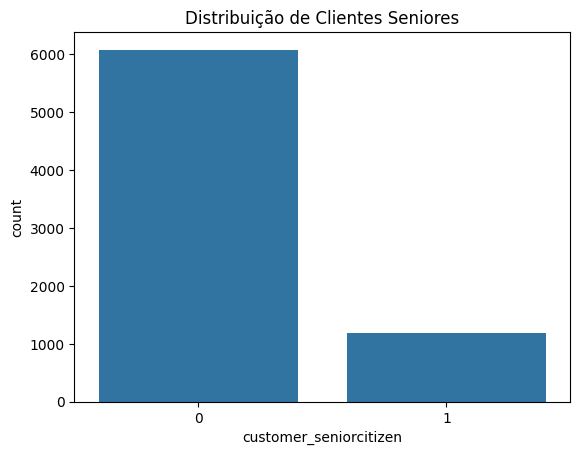

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='customer_seniorcitizen', data=dados)
plt.title('Distribuição de Clientes Seniores')
plt.show()

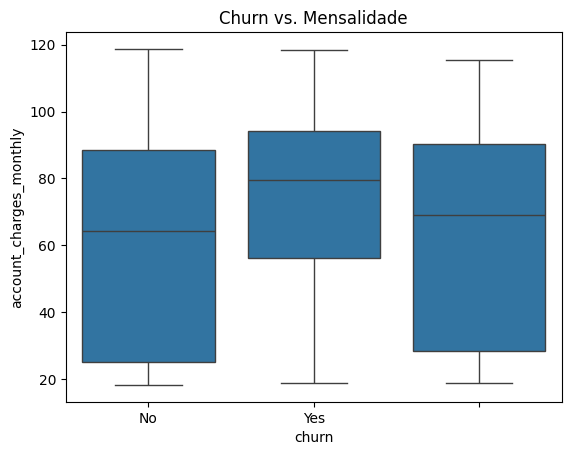

In [34]:
sns.boxplot(x='churn', y='account_charges_monthly', data=dados)
plt.title('Churn vs. Mensalidade')
plt.show()

In [35]:
dados['tempo_com_empresa'] = dados['customer_tenure']
dados['uso_por_mes'] = dados['account_charges_total'] / (dados['customer_tenure'] + 1)

#📄Relatorio Final

In [36]:
relatorio = ProfileReport(dados, title='Relatório TelecomX', explorative=True)
relatorio.to_notebook_iframe()  # ou: relatorio.to_file("relatorio_telecomx.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 27/27 [00:00<00:00, 31.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]